# Length contraction - 2 spatial dims

SpacetimeLib can work in any number of spatial dimensions. Let's look at an example of length contraction with two spatial dimensions.

We'll create and plot a circle of particles sitting at rest. We'll do this by just creating a number of `st.Worldline`s each with one vertex arranged in a circle. We'll combine all these worldlines into one `st.Frame`. Then we can plot the x- and y-coordinates of each of the particles at a particular time.

In [1]:
import spacetime as st
import numpy as np
import matplotlib.pyplot as plt


def generate_circle(num_particles, radius):
    worldlines = []
    
    for particle_idx in range(num_particles):
        theta = 2 * np.pi * particle_idx / num_particles
        x = radius * np.sin(theta)
        y = radius * np.cos(theta)
        worldlines.append(st.Worldline(
            [[0, x, y]],
            ends_vel_s=[0, 0]))
        
    return st.Frame(worldlines)

def plot_frame_eval(ax, frame_eval, dim0, dim1, label=None):
    coords = []
    
    for _, event, _ in frame_eval:
        coords.append([event[dim0], event[dim1]])
    
    coords = np.transpose(np.array(coords))
    
    ax.plot(*coords, marker='.', label=label)
    ax.set_xlabel('x-axis')
    ax.set_ylabel('y-axis')
    
    if label is not None:
        ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

Let's use a fairly large number of particles to make the plot of the circle look continuous.

In [2]:
frame_0 = generate_circle(500, 5)

Now we'll use `st.Frame.eval` to obtain the state of the frame at one particular time, `t = 0` in this case.

(-6.0, 6.0)

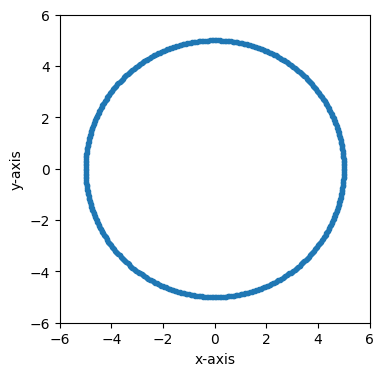

In [3]:
fig, ax = plt.subplots(figsize=(4, 4))
time = 0
plot_frame_eval(ax, frame_0.eval(time), 1, 2)
ax.set_xlim(-6, 6)
ax.set_ylim(-6, 6)

Now let's see what happens if we view this circle in another reference frame. Let's boost the frame by a velocity of 0.9 along the x-axis.

(-6.0, 6.0)

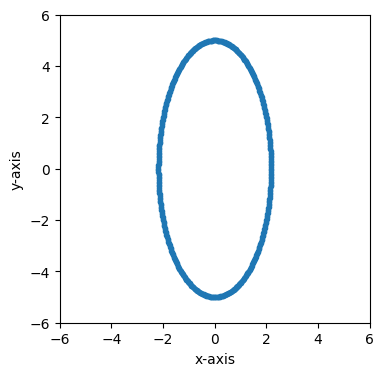

In [4]:
fig, ax = plt.subplots(figsize=(4, 4))
time = 0
frame_1 = frame_0.boost([0.9, 0])
plot_frame_eval(ax, frame_1.eval(time), 1, 2)
ax.set_xlim(-6, 6)
ax.set_ylim(-6, 6)

The circle is contracted along the x-axis because the boost velocity we used is along the x-axis.

Let's boost in some other direction that isn't along one of the basis vectors.

(-6.0, 6.0)

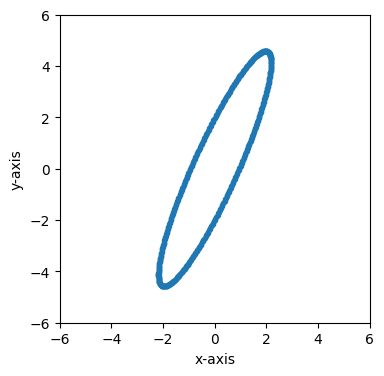

In [5]:
fig, ax = plt.subplots(figsize=(4, 4))
time = 0
frame_2 = frame_0.boost([-.9, .4])
plot_frame_eval(ax, frame_2.eval(time), 1, 2)
ax.set_xlim(-6, 6)
ax.set_ylim(-6, 6)

We can also easily step forward or backward in time to see how this contracted circle moves over time.

(-6.0, 6.0)

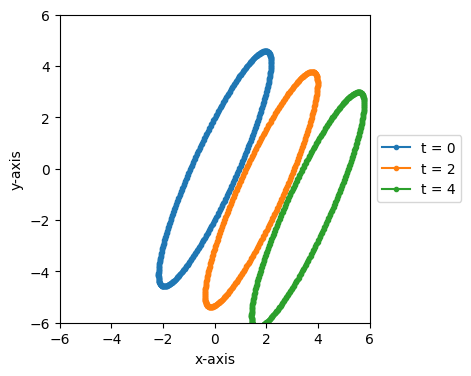

In [6]:
fig, ax = plt.subplots(figsize=(4, 4))

for time in [0, 2, 4]:
    plot_frame_eval(ax, frame_2.eval(time), 1, 2, label=f't = {time}')
    
ax.set_xlim(-6, 6)
ax.set_ylim(-6, 6)

Since we used a boost velocity of `[-0.9, 0.4]`, in this frame the contracted circle moves at a velocity of `[0.9, -0.4]`, the opposite of the boost velocity, which is down and to the right on the above plot.